<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras import models, layers, optimizers 
import matplotlib.pyplot as plt
# from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input


In [23]:
# Defining file paths. Model data is stored in Google drive
train_path = "drive/MyDrive/CE888_data/Training"
test_path = "drive/MyDrive/CE888_data/Test"
img_dimension = (254, 254)

In [24]:
# Implemeneted generator to read in image files. This generator is only used for visualization
train_image_gen_visual = ImageDataGenerator(rescale=1./255)                                 
test_image_gen_visual = ImageDataGenerator(rescale=1./255)
preprocessing_train_generator = train_image_gen_visual.flow_from_directory(train_path, 
                                                   target_size = img_dimension, 
                                                   batch_size = 1,
                                                   class_mode = 'binary')
preprocessing_test_generator = test_image_gen_visual.flow_from_directory(test_path, 
                                                   target_size = img_dimension, 
                                                   batch_size = 1,
                                                   class_mode = 'binary')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [25]:
def show_sample_images(generator, image_title):
  fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(25,4))
  for i, ax in enumerate(axs.flatten()):
      img, label = generator.next()
      plt.sca(ax)
      plt.imshow(img[0])
      plt.title('Image: {}'.format(i+1))
  plt.suptitle(image_title)
  plt.show()

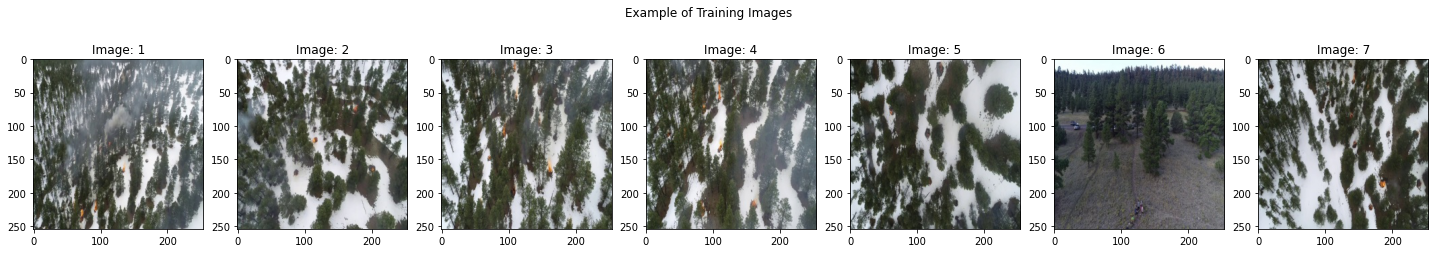

In [26]:
# Displaying example images from train dataset 
show_sample_images(preprocessing_train_generator, "Example of Training Images")

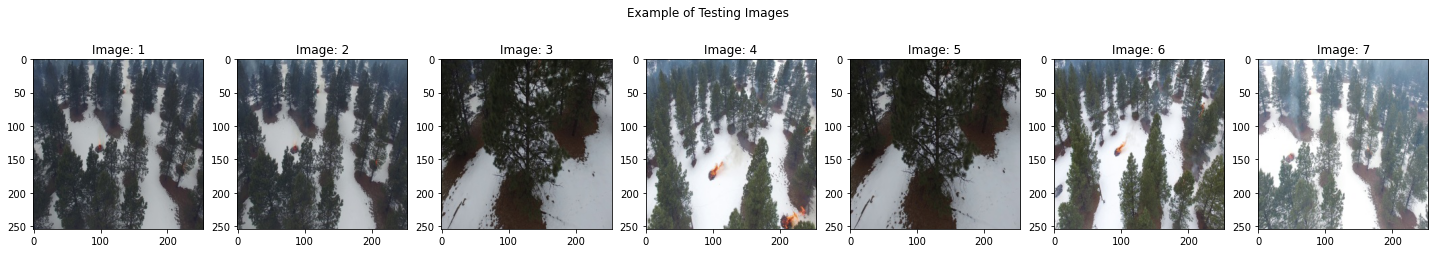

In [27]:
# Displaying example images from test dataset
show_sample_images(preprocessing_test_generator, "Example of Testing Images")

In [28]:
# Load Pre-trained CNN
pre_trained_model = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(254, 254, 3)
)
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [29]:
# Building Custom model
pre_trained_model.trainable = False
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
batch_size = 1
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


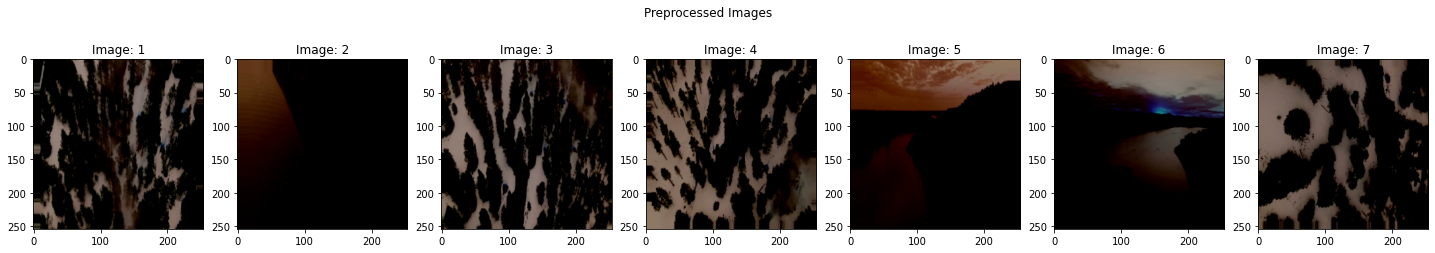

In [33]:
show_sample_images(train_generator, "Preprocessed Images")

In [21]:
history = model.fit(train_generator, epochs=1, 
                    validation_data=validation_generator)

  5/985 [..............................] - ETA: 4:33:24 - loss: 1.7848 - acc: 0.4175

KeyboardInterrupt: ignored

In [ ]:
test_image_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_image_gen.flow_from_directory(
    test_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='binary')
    

In [ ]:
# Predicting the images from the first batch 
img, label = test_generator[0] 
pred = np.round(model.predict(img)).flatten()

In [ ]:
#  Numeric to semantic labels 
label_dict = {1.0: 'No fire', 0.0: 'Fire'}

# Generating collage of plots 
fig = plt.figure(figsize=(10, 9))
plt.title('Classification by the model')
plt.axis('off')

for i, img_i in enumerate(img[:20]):
    ax = fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    plt.title(label_dict[pred[i]], y=-0.2)
    ax.imshow(img_i)